In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## import lib 

In [71]:
import numpy as np 
import mne
import scipy as sp 
import pandas as pd 

import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

import seaborn as sns 
import matplotlib.pyplot as plt



In [131]:
sample_data_folder = mne.datasets.sample.data_path()
# sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
#                         'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file C:\Users\Tom\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [132]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


In [105]:
raw = raw["eeg"]  

In [106]:
values = np.array([float(v) for v in raw[0][0]])
test = pd.DataFrame(values)
test["time"] = np.array([float(v) for v in raw[1]])
test
# sns.scatterplot(x=raw, y=raw)

,0,time
0,-0.000004,0.000000
1,-0.000014,0.006660
2,-0.000014,0.013320
3,-0.000011,0.019980
4,-0.000015,0.026639
...,...,...
41695,0.000034,277.682047
41696,0.000026,277.688707
41697,0.000020,277.695367
41698,0.000017,277.702027


In [107]:
test = test.rename(columns={0: "µV"})

In [108]:
fig = go.Figure(data=go.Scatter(x=test["time"], y=test["µV"]))
layout = dict(xaxis = dict(rangeslider = dict(visible = True)))
fig.update_layout(layout)

## Fourrier transform 

In [116]:
test["fft"] = sp.fft.fft(test["µV"].values)/len(test["µV"].values)

In [117]:
test

,µV,time,fft
0,-0.000004,0.000000,-1.313840e-07+0.000000e+00j
1,-0.000014,0.006660,3.918027e-07+1.649753e-06j
2,-0.000014,0.013320,-1.300032e-06+2.309713e-07j
3,-0.000011,0.019980,-8.203133e-07-2.036513e-06j
4,-0.000015,0.026639,1.416948e-06-1.251216e-06j
...,...,...,...
41695,0.000034,277.682047,2.070638e-06-1.537308e-07j
41696,0.000026,277.688707,1.416948e-06+1.251216e-06j
41697,0.000020,277.695367,-8.203133e-07+2.036513e-06j
41698,0.000017,277.702027,-1.300032e-06-2.309713e-07j


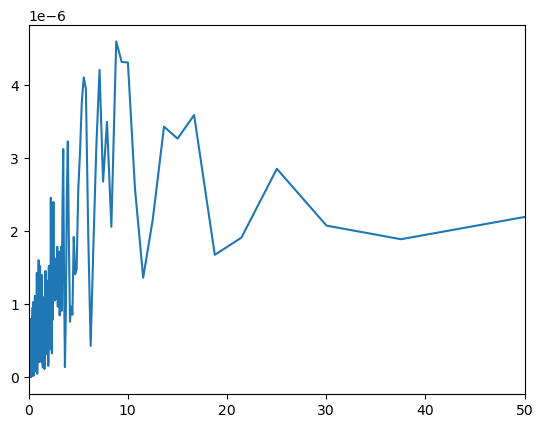

In [119]:
plt.plot(np.abs(1/test["time"]),np.abs(test["fft"]))
plt.xlim(0,50)
plt.show()

Effective window size : 13.639 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


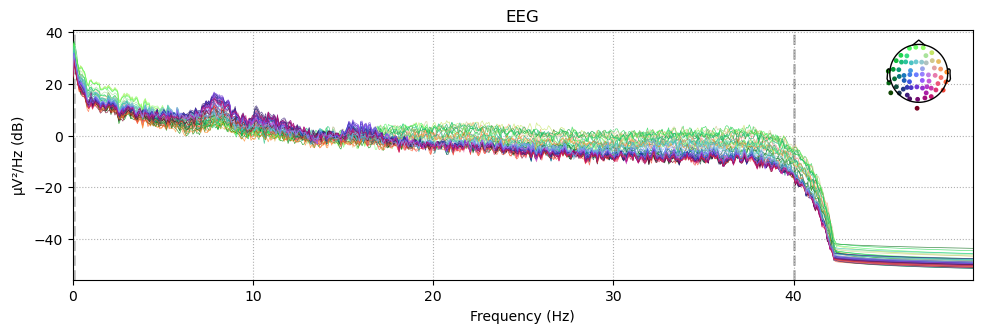

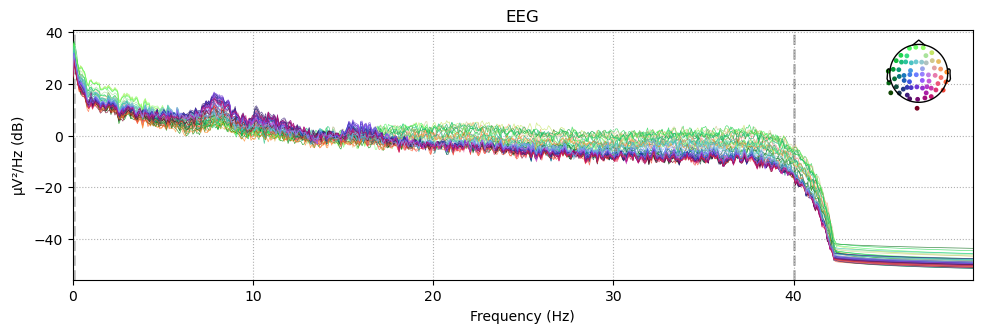

In [138]:
raw.plot_psd(fmax=50,picks="eeg")

Creating RawArray with float64 data, n_channels=1, n_times=1739499
    Range : 0 ... 1739498 =      0.000 ...  6957.992 secs
Ready.


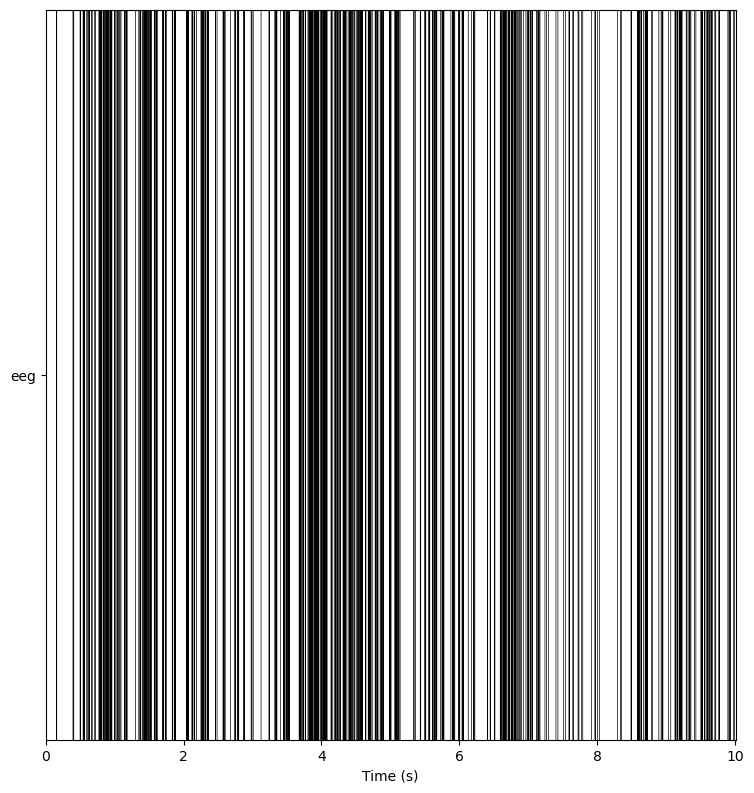

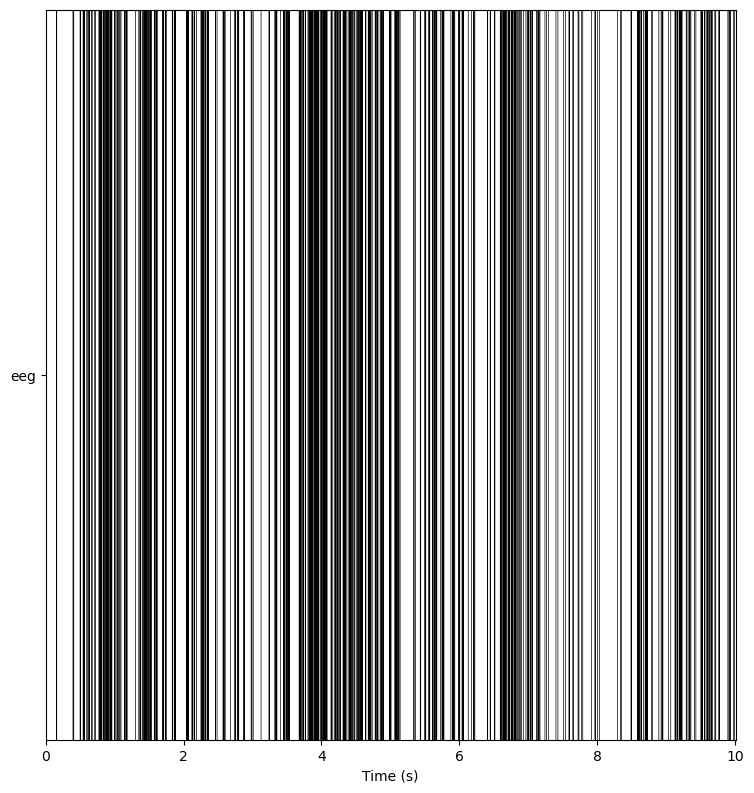

In [164]:
df = pd.read_csv("../data/EEGArchi13mPFC.txt")
df["time"] = df.index*1/250
sampling_freq = 250

# times = np.linspace(0, len(df[0]), sampling_freq, endpoint=False)
eeg = df["0"]
# cosine = np.cos(10 * np.pi * times)
data = np.array([eeg])

info = mne.create_info(ch_names=['eeg'],
                       ch_types=['eeg'],
                       sfreq=sampling_freq)

simulated_raw = mne.io.RawArray(data, info)
simulated_raw.plot(show_scrollbars=False, show_scalebars=False)

In [162]:
simulated_raw.plot_psd(fmax=50,picks="eeg")

RuntimeError: Some channel names are ambiguously equivalent to channel types, cannot use string-based picks for these